In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew

from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

# XGBoost
import xgboost as xgb

# warning 
import warnings
warnings.filterwarnings('ignore')

column_name = ["MPG", "Cylinders", "Displacement","Horsepower","Weight","Acceleration","Model Year", "Origin"]
data = pd.read_csv("auto-mpg.data", names = column_name, na_values = "?", comment = "\t",sep = " ", skipinitialspace = True)

data = data.rename(columns = {"MPG":"target"})

In [67]:
import pandas_profiling as pp
profile = data.profile_report(title='Car Dataset First Look', pool_size = 0)
profile.to_file(output_file="output.html")

Data Set Information:

This dataset is a slightly modified version of the dataset provided in the StatLib library. In line with the use by Ross Quinlan (1993) in predicting the attribute "mpg", 8 of the original instances were removed because they had unknown values for the "mpg" attribute. The original dataset is available in the file "auto-mpg.data-original".

"The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes." (Quinlan, 1993)


Attribute Information:

1. mpg: continuous- yakıt tüketimi 
2. cylinders: multi-valued discrete - silindir sayısı 
3. displacement: continuous - motor inç olarak
4. horsepower: continuous - beygir gücü 
5. weight: continuous - agırlık pound olarak 
6. acceleration: continuous - hızlanma
7. model year: multi-valued discrete
8. origin: multi-valued discrete - 1 usa 2 europa 3 japan 
9. car name: string (unique for each instance)

In [3]:
print(data.head())
print("Data shape: ",data.shape)

   target  Cylinders  Displacement  Horsepower  Weight  Acceleration  \
0    18.0          8         307.0       130.0  3504.0          12.0   
1    15.0          8         350.0       165.0  3693.0          11.5   
2    18.0          8         318.0       150.0  3436.0          11.0   
3    16.0          8         304.0       150.0  3433.0          12.0   
4    17.0          8         302.0       140.0  3449.0          10.5   

   Model Year  Origin  
0          70       1  
1          70       1  
2          70       1  
3          70       1  
4          70       1  
Data shape:  (398, 8)


In [4]:
data.info()#HorsePower has 6 missing value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   target        398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


In [5]:
describe = data.describe(include ='all').T
describe

,count,mean,std,min,25%,50%,75%,max
target,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
Cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
Displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
Horsepower,392.0,104.469388,38.491160,46.0,75.000,93.5,126.000,230.0
Weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
Acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
Model Year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
Origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


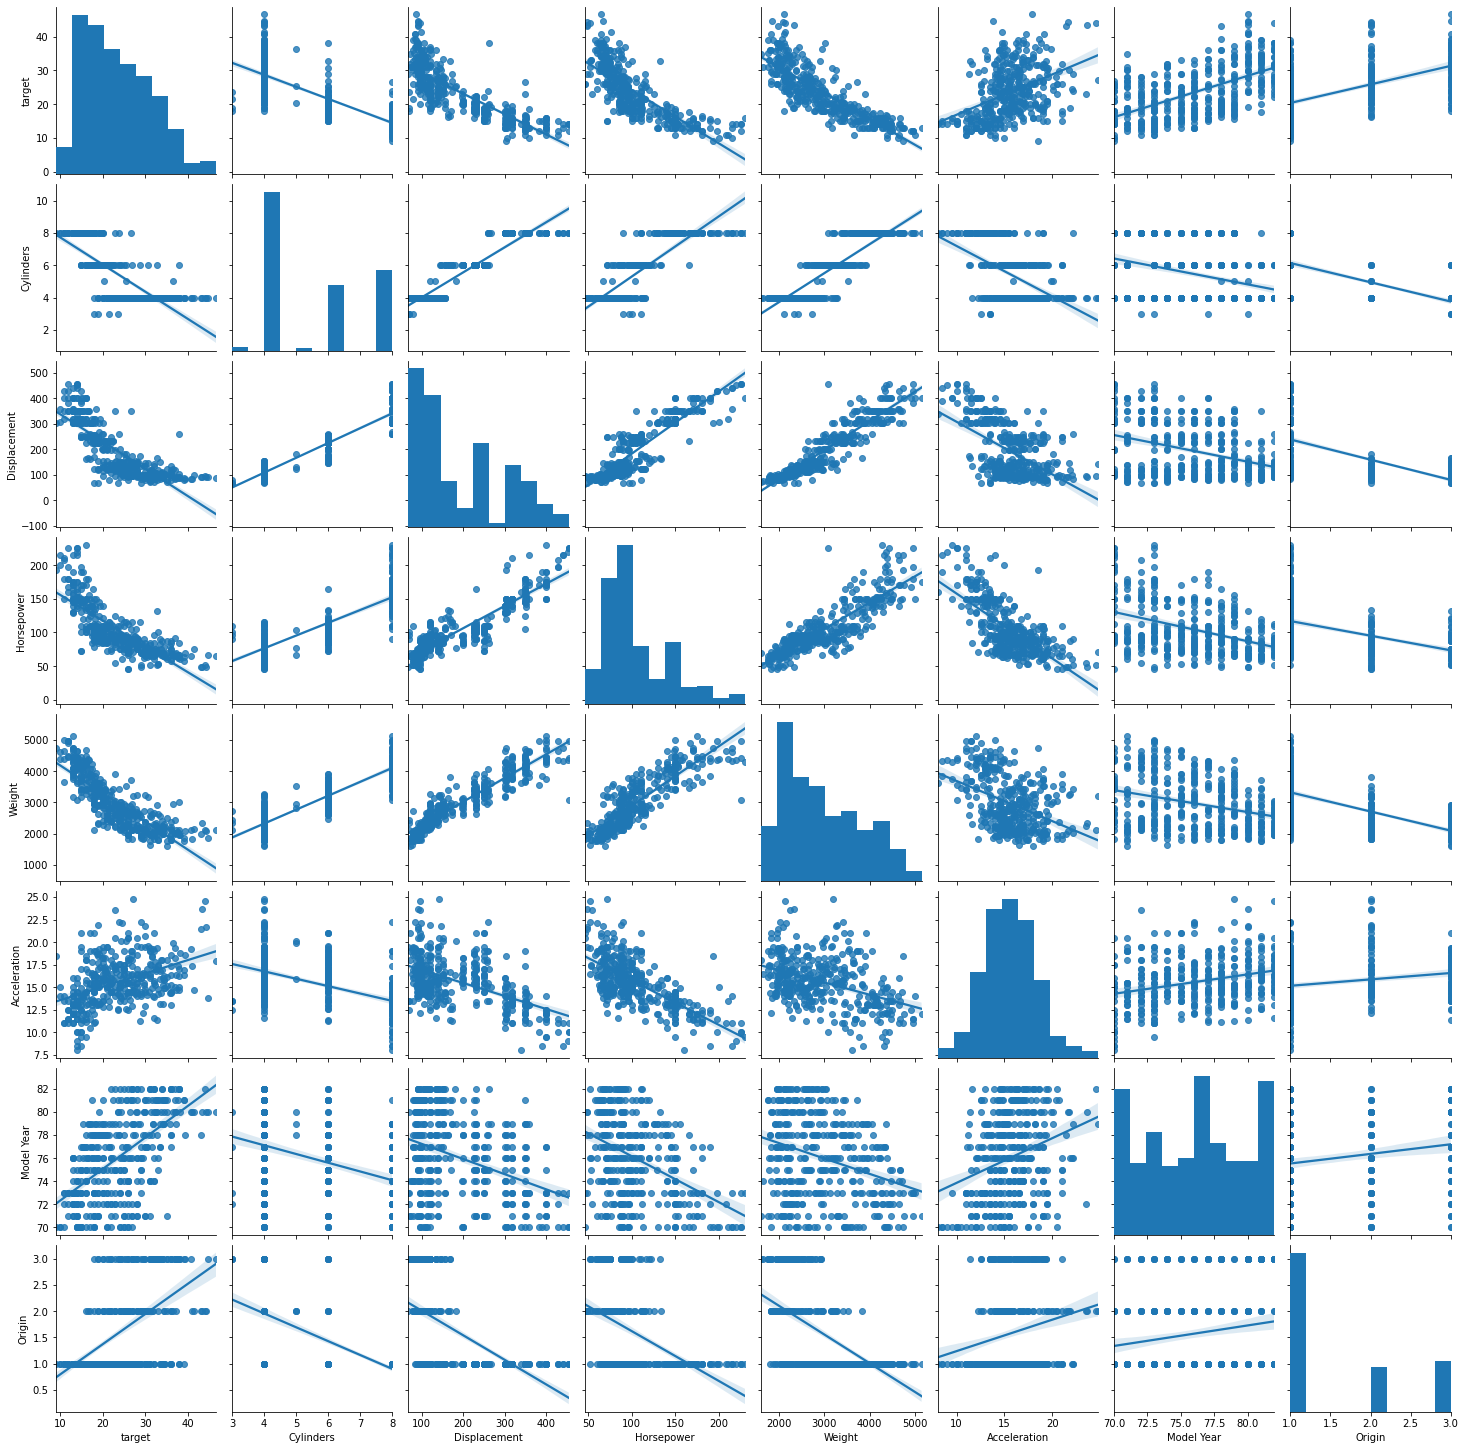

In [6]:
import seaborn as sns
sns.pairplot(data, kind  ="reg");

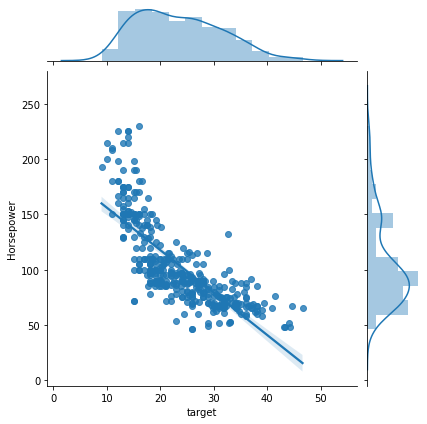

In [7]:
sns.jointplot(x = "target", y = "Horsepower", data = data, kind = "reg")

In [8]:
data.columns

Index(['target', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [9]:
import statsmodels.api as sm

In [10]:
X = data[["target"]]
X = sm.add_constant(X)
y = data['Displacement']
#data.drop(['target'],axis=1)

In [11]:
lm = sm.OLS(y,X)

In [12]:
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Displacement   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     725.0
Date:                Sat, 11 Jul 2020   Prob (F-statistic):           1.66e-91
Time:                        15:46:16   Log-Likelihood:                -2206.7
No. Observations:                 398   AIC:                             4417.
Df Residuals:                     396   BIC:                             4425.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        445.7029      9.872     45.147      0.000     426.295     465.111
target       -10.7285      0.398    -26.926      0.000     -11.512      -9.945
==============================================================================
Omnibus:                        8.418   Durbin-Watson:                   0.998
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                8.440
Skew:                           0.311   Prob(JB):                       0.0147
Kurtosis:                       3.348   Cond. No.                         78.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [13]:
model.params

const     445.702909
target    -10.728540
dtype: float64

In [14]:
model.summary().tables[0]

Dep. Variable:,Displacement,R-squared:,0.647
Model:,OLS,Adj. R-squared:,0.646
Method:,Least Squares,F-statistic:,725.0
Date:,"Sat, 11 Jul 2020",Prob (F-statistic):,1.66e-91
Time:,15:46:16,Log-Likelihood:,-2206.7
No. Observations:,398,AIC:,4417.
Df Residuals:,396,BIC:,4425.
Df Model:,1,,
Covariance Type:,nonrobust,,


In [15]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,445.7029,9.872,45.147,0.000,426.295,465.111
target,-10.7285,0.398,-26.926,0.000,-11.512,-9.945


In [16]:
model.summary().tables[2]

Omnibus:,8.418,Durbin-Watson:,0.998
Prob(Omnibus):,0.015,Jarque-Bera (JB):,8.440
Skew:,0.311,Prob(JB):,0.0147
Kurtosis:,3.348,Cond. No.,78.8


In [17]:
model.conf_int()

,0,1
const,426.294523,465.111296
target,-11.511881,-9.945199


In [18]:
model.f_pvalue

1.6558889101927833e-91

In [19]:
print("tvalue: ", "%.2f" % model.tvalues[0:1])

tvalue:  45.15


In [20]:
print("target = " +  str("%.2f" % model.params[0]) + " + Displacement" + "*" + str("%.2f" % model.params[1]))

target = 445.70 + Displacement*-10.73


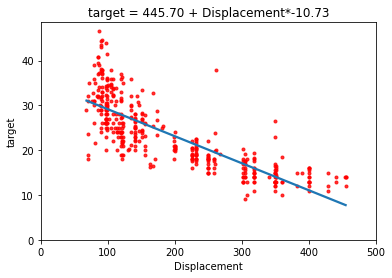

In [21]:
g = sns.regplot(data["Displacement"], data["target"], ci=None, scatter_kws={'color':'r', 's':9})
g.set_title("target = 445.70 + Displacement*-10.73")
g.set_ylabel("target")
g.set_xlabel("Displacement")
import matplotlib.pyplot as plt
plt.xlim(0,500)
plt.ylim(bottom=0);

In [22]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y, model.fittedvalues)
mse

3831.039360682221

In [23]:
rmse = np.sqrt(mse)
rmse

61.895390463928905

In [24]:
data.isnull().values.any()

True

In [25]:
print(data.isna().sum())

target          0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


In [26]:
#Missing Value Burada mean atandı ben knn kullancam 

In [27]:
data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())

print(data.isna().sum())

target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64
target          0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64


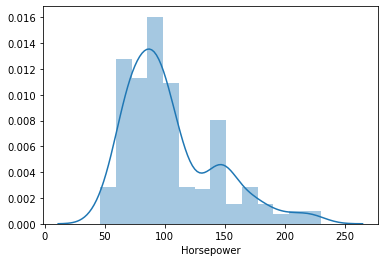

In [28]:
# %% missing value
print(data.isna().sum())

data["Horsepower"] = data["Horsepower"].fillna(data["Horsepower"].mean())

print(data.isna().sum())

sns.distplot(data.Horsepower)

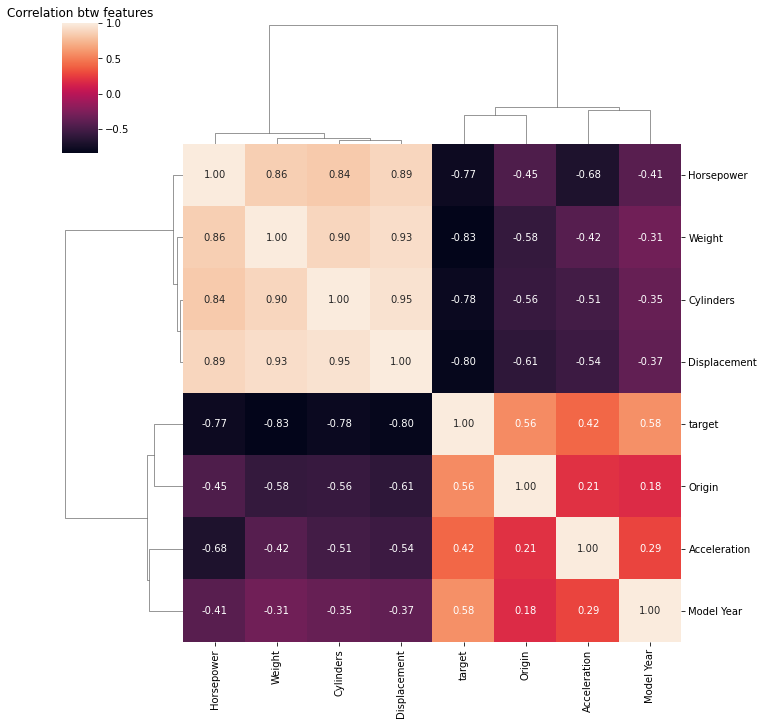

In [29]:
# %% EDA

corr_matrix = data.corr()
sns.clustermap(corr_matrix, annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

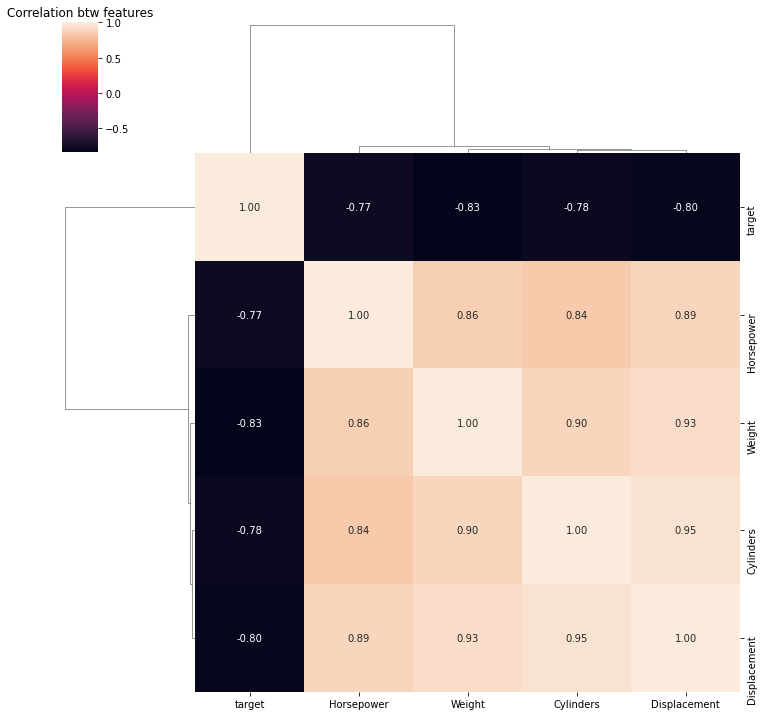

'\nmulticollinearity\n'

In [30]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"])>threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation btw features")
plt.show()

"""
multicollinearity
"""

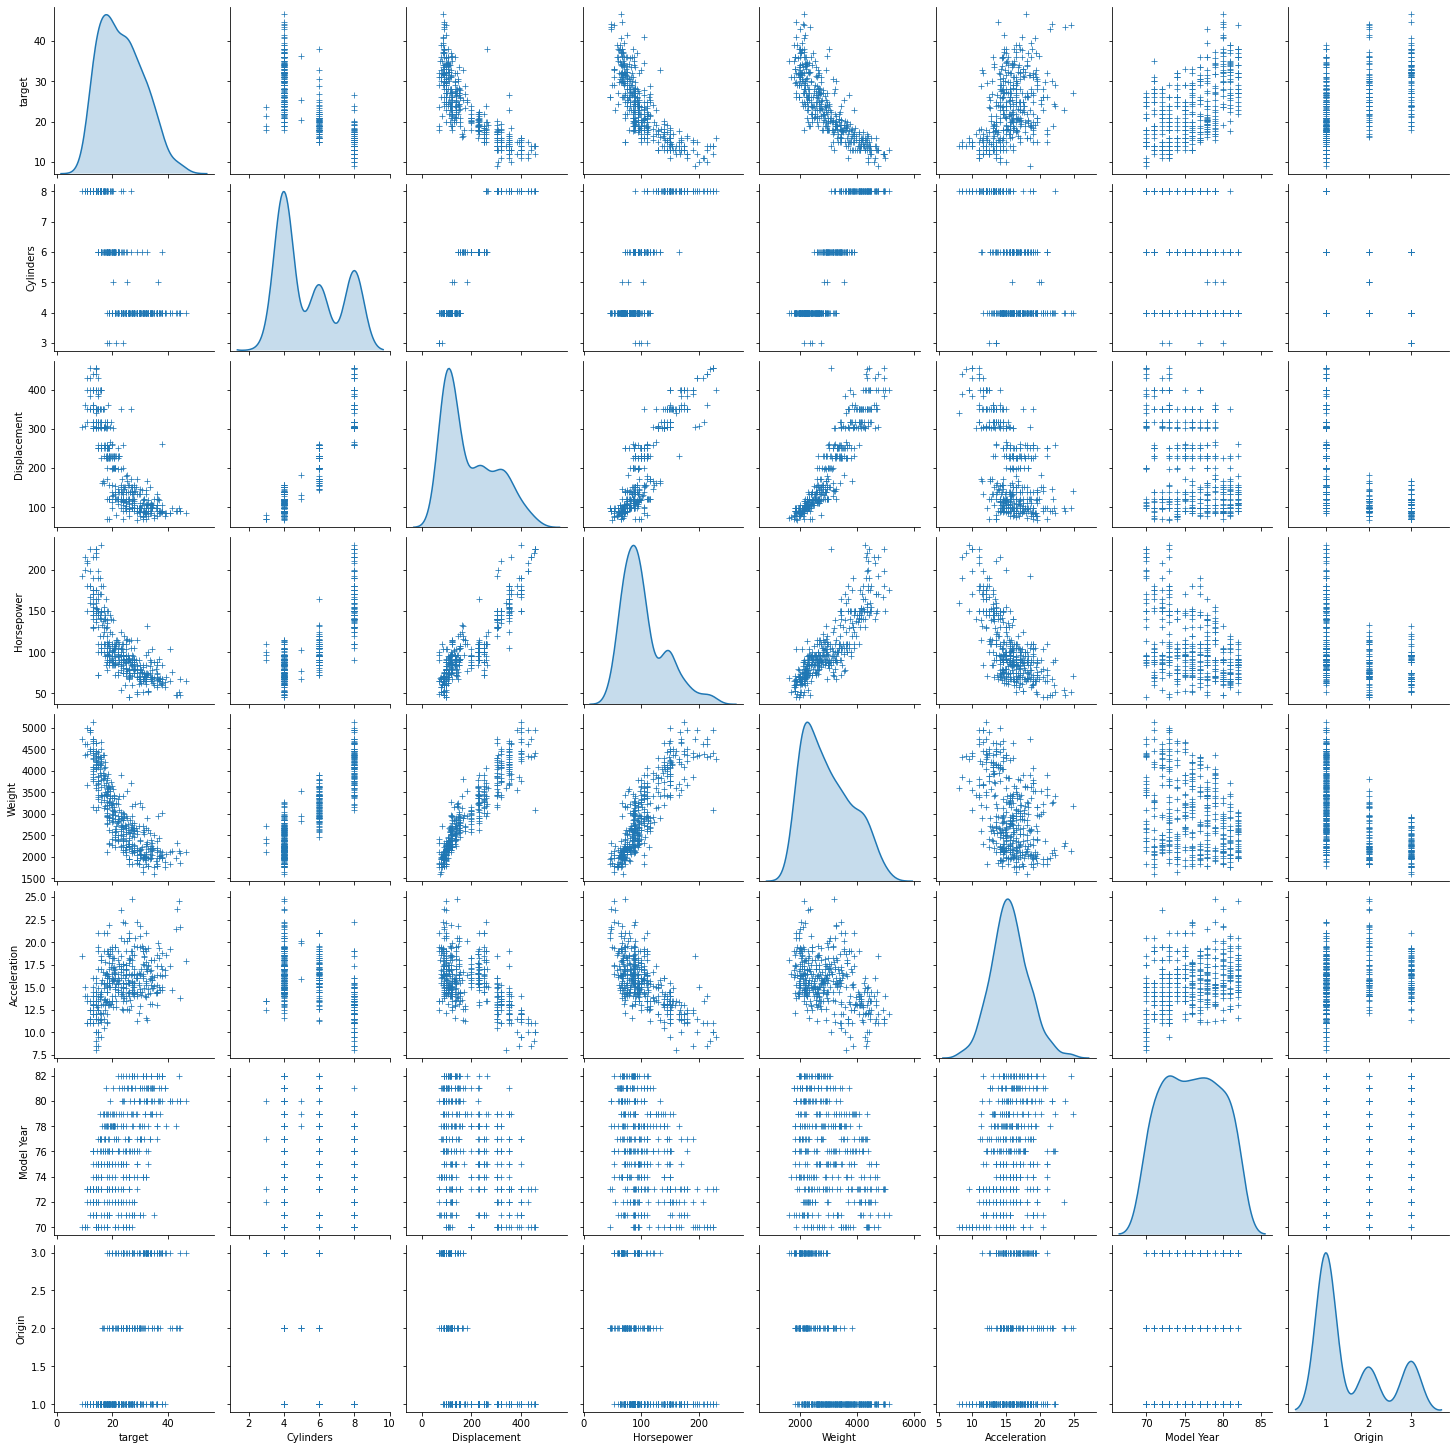

'\ncylinders and origin can be categorical (feature engineering)\n'

In [31]:

sns.pairplot(data, diag_kind = "kde", markers = "+")
plt.show()

"""
cylinders and origin can be categorical (feature engineering)
"""


4    204
8    103
6     84
3      4
5      3
Name: Cylinders, dtype: int64
1    249
3     79
2     70
Name: Origin, dtype: int64


'\noutlier: horsepower and acceleration\n'

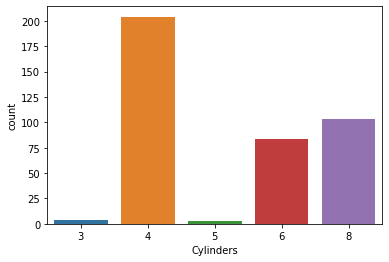

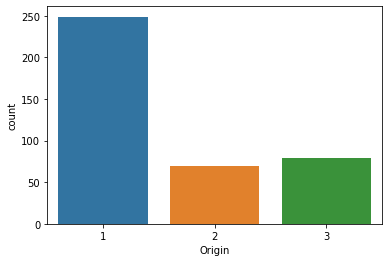

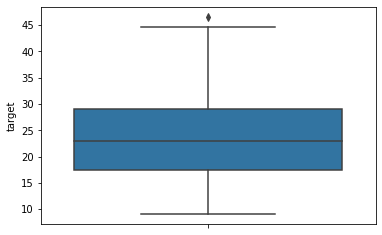

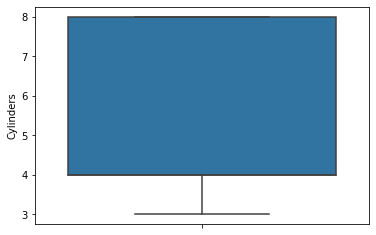

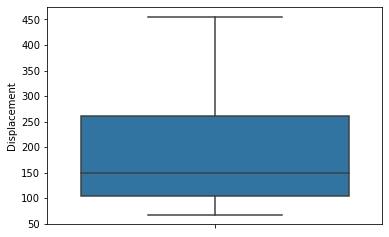

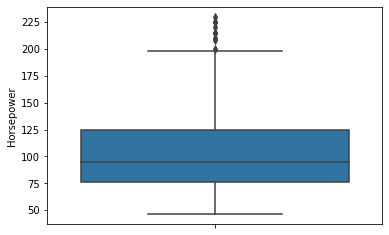

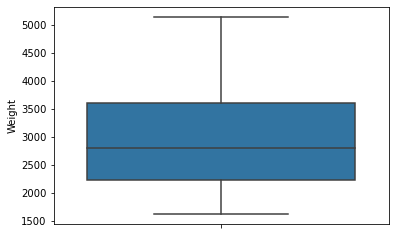

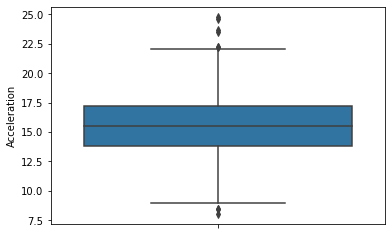

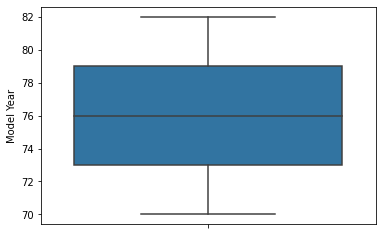

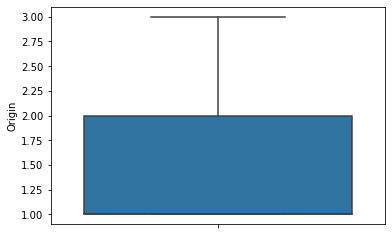

In [32]:
plt.figure()
sns.countplot(data["Cylinders"])
print(data["Cylinders"].value_counts())

plt.figure()
sns.countplot(data["Origin"])
print(data["Origin"].value_counts())

# box
for c in data.columns:
    plt.figure()
    sns.boxplot(x = c, data = data, orient = "v")

"""
outlier: horsepower and acceleration
"""

In [33]:
# %% 

thr = 2
horsepower_desc = data["Horsepower"].describe()
q3_hp = horsepower_desc[6]
q1_hp = horsepower_desc[4]
IQR_hp = q3_hp - q1_hp
top_limit_hp = q3_hp + thr*IQR_hp
bottom_limit_hp = q1_hp - thr*IQR_hp
filter_hp_bottom = bottom_limit_hp < data["Horsepower"]
filter_hp_top = data["Horsepower"] < top_limit_hp
filter_hp = filter_hp_bottom & filter_hp_top

data = data[filter_hp]

acceleration_desc = data["Acceleration"].describe()
q3_acc = acceleration_desc[6]
q1_acc = acceleration_desc[4]
IQR_acc = q3_acc - q1_acc # q3 - q1
top_limit_acc = q3_acc + thr*IQR_acc
bottom_limit_acc = q1_acc - thr*IQR_acc
filter_acc_bottom = bottom_limit_acc < data["Acceleration"]
filter_acc_top= data["Acceleration"] < top_limit_acc
filter_acc = filter_acc_bottom & filter_acc_top

data = data[filter_acc] # remove Horsepower outliers


mu: 23.499232736572893, sigma = 7.678599778082707


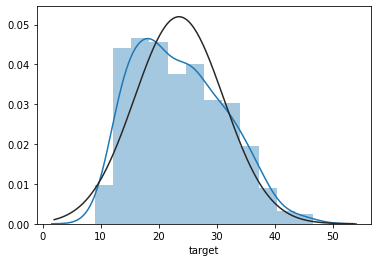

In [34]:
# %% Feature Engineering
# Skewness

# target dependent variable
sns.distplot(data.target, fit = norm)

(mu, sigma) = norm.fit(data["target"])#log edılmıs targetın yenı mu ve sigma değerleri
print("mu: {}, sigma = {}".format(mu, sigma))

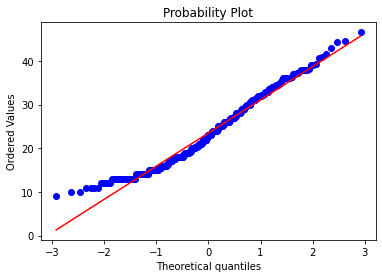

In [35]:
# qq plot
plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()

mu: 3.148549778053243, sigma = 0.31986792768696354


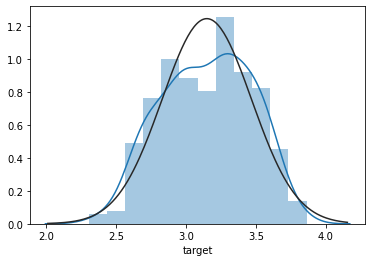

In [36]:
data["target"] = np.log1p(data["target"]) #target'a log donusumu yapıyoruz

plt.figure()
sns.distplot(data.target, fit = norm)

(mu, sigma) = norm.fit(data["target"])
print("mu: {}, sigma = {}".format(mu, sigma))

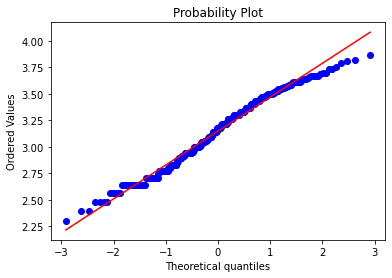

In [37]:
# qq plot
plt.figure()
stats.probplot(data["target"], plot = plt)
plt.show()
#kırmızı normal dagılım mavı olan datanın dagılımı 
#log donusumu kas

In [38]:
# feature - independent variable 
skewed_feats = data.apply(lambda x: skew(x.dropna())).sort_values(ascending = False)
skewness = pd.DataFrame(skewed_feats, columns = ["skewed"])
skewness
#Box Cox Transformation

,skewed
Horsepower,1.002620
Origin,0.915147
Displacement,0.692506
Cylinders,0.539419
Weight,0.530167
Acceleration,0.144566
Model Year,0.010762
target,-0.134213


In [39]:
from scipy.stats import boxcox
data['Horsepower'] = boxcox(data['Horsepower'], lmbda=0.0)#horsepower'a boxcox donusumu yapıyoruz çarpıklıktan ötürü

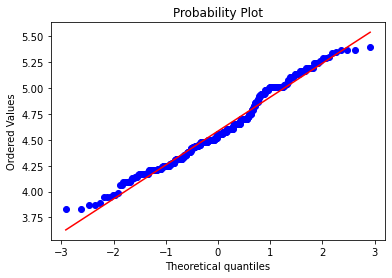

In [40]:
plt.figure()
stats.probplot(data["Horsepower"], plot = plt)
plt.show()

In [41]:
# %% one hot encoding
data["Cylinders"] = data["Cylinders"].astype(str)  
data["Origin"] = data["Origin"].astype(str) 

data = pd.get_dummies(data)#categoricallara one hot encoding yapar onlara özel feature açar

In [42]:
data

,target,Displacement,Horsepower,Weight,Acceleration,Model Year,Cylinders_3,Cylinders_4,Cylinders_5,Cylinders_6,Cylinders_8,Origin_1,Origin_2,Origin_3
0,2.944439,307.0,4.867534,3504.0,12.0,70,0,0,0,0,1,1,0,0
1,2.772589,350.0,5.105945,3693.0,11.5,70,0,0,0,0,1,1,0,0
2,2.944439,318.0,5.010635,3436.0,11.0,70,0,0,0,0,1,1,0,0
3,2.833213,304.0,5.010635,3433.0,12.0,70,0,0,0,0,1,1,0,0
4,2.890372,302.0,4.941642,3449.0,10.5,70,0,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,3.332205,151.0,4.499810,2950.0,17.3,82,0,1,0,0,0,1,0,0
393,3.332205,140.0,4.454347,2790.0,15.6,82,0,1,0,0,0,1,0,0
395,3.496508,135.0,4.430817,2295.0,11.6,82,0,1,0,0,0,1,0,0
396,3.367296,120.0,4.369448,2625.0,18.6,82,0,1,0,0,0,1,0,0


In [43]:
# %% Split - Stand

# Split
x = data.drop(["target"], axis = 1)
y = data.target

test_size = 0.2
X_train, X_test, Y_train, Y_test = train_test_split(x,y, test_size = test_size, random_state = 42)


In [44]:
lm = sm.OLS(Y_train, X_train)
model = lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     253.0
Date:                Sat, 11 Jul 2020   Prob (F-statistic):          1.33e-144
Time:                        15:46:28   Log-Likelihood:                 270.59
No. Observations:                 312   AIC:                            -517.2
Df Residuals:                     300   BIC:                            -472.3
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Displacement     0.0002      0.000      0.884      0.378      -0.000       0.001
Horsepower      -0.2510      0.057     -4.367      0.000      -0.364      -0.138
Weight          -0.0002   2.82e-05     -6.776      0.000      -0.000      -0.000
Acceleration    -0.0107      0.004     -2.734      0.007      -0.018      -0.003
Model Year       0.0280      0.002     15.089      0.000       0.024       0.032
Cylinders_3      0.9288      0.132      7.039      0.000       0.669       1.188
Cylinders_4      1.1545      0.121      9.569      0.000       0.917       1.392
Cylinders_5      1.0848      0.141      7.721      0.000       0.808       1.361
Cylinders_6      1.0653      0.124      8.571      0.000       0.821       1.310
Cylinders_8      1.0584      0.130      8.150      0.000       0.803       1.314
Origin_1         1.7225      0.205      8.406      0.000       1.319       2.126
Origin_2         1.7708      0.201      8.793      0.000       1.374       2.167
Origin_3         1.7985      0.204      8.800      0.000       1.396       2.201
==============================================================================
Omnibus:                        8.111   Durbin-Watson:                   1.886
Prob(Omnibus):                  0.017   Jarque-Bera (JB):               13.245
Skew:                           0.091   Prob(JB):                      0.00133
Kurtosis:                       3.993   Cond. No.                     2.84e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.72e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [45]:
# Standardization
scaler = RobustScaler()  # RobustScaler #StandardScaler
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [46]:
# %% Regression Models
# linear regression
lr = LinearRegression()
lr.fit(X_train, Y_train)
print("LR Coef: ",lr.coef_)
print("LR intercept_: ",lr.intercept_)
y_predicted_dummy = lr.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Linear Regression MSE: ",mse)

LR Coef:  [ 3.90758223e-02 -1.21159619e-01 -2.70110458e-01 -3.38611614e-02
  1.68048173e-01 -1.29586737e-01  9.61431163e-02  2.64642197e-02
  6.92012405e-03  5.92768785e-05 -4.14434679e-02  6.84873646e-03
  3.45947314e-02]
LR intercept_:  3.1947111853178902
Linear Regression MSE:  0.01237756742660923


In [47]:
lr.score(X_train, Y_train)

0.9027032133310553

In [48]:
from sklearn.model_selection import cross_val_score
cross_val_score(lr, X_train, Y_train, cv = 10, scoring = "r2").mean()

0.8860685944513949

In [49]:
# Ridge Regression (L2)

ridge = Ridge(random_state = 42, max_iter = 10000)
alphas = np.logspace(-4,-0.5,30)

tuned_parameters = [{'alpha':alphas}]
n_folds = 10

clf = GridSearchCV(ridge, tuned_parameters, cv = n_folds, scoring = "neg_mean_squared_error", refit = True)
clf.fit(X_train, Y_train)
scores = clf.cv_results_["mean_test_score"]
scores_std = clf.cv_results_["std_test_score"]

print("Ridge Coef: ",clf.best_estimator_.coef_)
print("Ridge Coef: ",clf.best_estimator_.intercept_)
ridge = clf.best_estimator_
print("Ridge Best Estimator: ", ridge)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test, y_predicted_dummy)
print("Ridge MSE: ",mse)
print("-----------------------------------------------------------")


Ridge Coef:  [ 0.03194297 -0.12376676 -0.26060107 -0.03493391  0.16703673 -0.12022468
  0.09512654  0.02065282  0.00555733 -0.00111202 -0.04075847  0.00634049
  0.03441798]
Ridge Coef:  3.196358657054034
Ridge Best Estimator:  Ridge(alpha=0.31622776601683794, max_iter=10000, random_state=42)
Ridge MSE:  0.01245915396649617
-----------------------------------------------------------


In [50]:
ridge.score(X_train, Y_train)

0.9026659869646144

In [51]:
cross_val_score(ridge, X_train, Y_train, cv = 10, scoring = "r2").mean()

0.886099818914641

Text(0.5, 1.0, 'Ridge')

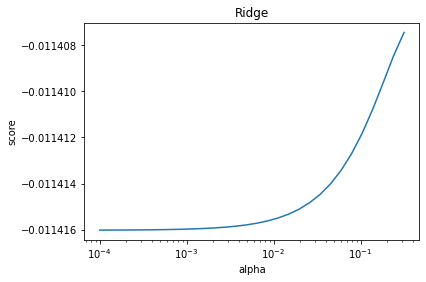

In [52]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Ridge")


In [53]:
# Lasso Regression (L1)

lasso = Lasso(random_state=42, max_iter=10000)
alphas = np.logspace(-4, -0.5, 30)

tuned_parameters = [{'alpha': alphas}]
n_folds = 10

clf = GridSearchCV(lasso, tuned_parameters, cv=n_folds, scoring='neg_mean_squared_error',refit=True)#refit parametresi clf'yi
#yeniden ve yenıden kullanmamıza ımkan verir
clf.fit(X_train,Y_train)
scores = clf.cv_results_['mean_test_score']
scores_std = clf.cv_results_['std_test_score']

print("Lasso Coef: ",clf.best_estimator_.coef_)
print("Lasso Coef: ",clf.best_estimator_.intercept_)
lasso = clf.best_estimator_
print("Lasso Best Estimator: ",lasso)

y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Lasso MSE: ",mse)
print("---------------------------------------------------------------")

Lasso Coef:  [ 0.01727087 -0.11948456 -0.25862947 -0.03374321  0.16652925 -0.11409552
  0.08435105  0.         -0.          0.         -0.04441868 -0.
  0.02558984]
Lasso Coef:  3.1972414136665823
Lasso Best Estimator:  Lasso(alpha=0.0003039195382313198, max_iter=10000, random_state=42)
Lasso MSE:  0.012585470800198116
---------------------------------------------------------------


In [54]:
lasso.score(X_train, Y_train)

0.9024858457364485

In [55]:
cross_val_score(lasso, X_train, Y_train, cv = 10, scoring = "r2").mean()

0.8862869449200961

Text(0.5, 1.0, 'Lasso')

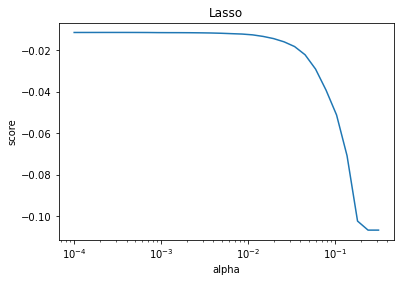

In [56]:
plt.figure()
plt.semilogx(alphas, scores)
plt.xlabel("alpha")
plt.ylabel("score")
plt.title("Lasso")

In [57]:
# ElasticNet
#yüksek korelasyon içeren labellarda başarılı
parametersGrid = {"alpha": alphas,
                  "l1_ratio": np.arange(0.0, 1.0, 0.05)}

eNet = ElasticNet(random_state=42, max_iter=10000)
clf = GridSearchCV(eNet, parametersGrid, cv=n_folds, scoring='neg_mean_squared_error', refit=True)
clf.fit(X_train, Y_train)
eNet = clf.best_estimator_

print("ElasticNet Coef: ",clf.best_estimator_.coef_)
print("ElasticNet Coef: ",clf.best_estimator_.intercept_)
print("ElasticNet Best Estimator: ",clf.best_estimator_)


y_predicted_dummy = clf.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("ElasticNet MSE: ",mse)

ElasticNet Coef:  [ 0.0013681  -0.12232163 -0.24076018 -0.03529209  0.16420207 -0.09003621
  0.08475789  0.         -0.          0.         -0.04064949  0.
  0.02614803]
ElasticNet Coef:  3.2013620998192667
ElasticNet Best Estimator:  ElasticNet(alpha=0.0021261123338996556, l1_ratio=0.2, max_iter=10000,
           random_state=42)
ElasticNet MSE:  0.01272657140623465


In [58]:
eNet.score(X_train, Y_train)

0.9019791117835383

In [59]:
cross_val_score(eNet, X_train, Y_train, cv = 10, scoring = "r2").mean()

0.8862755238721324

In [62]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from scipy.stats import norm, skew
import xgboost as xgb 
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.base import clone

# %% XGBoost

model_xgb = xgb.XGBRegressor()#tree_method='gpu_hist', gpu_id=0
parametersGrid = {'objective':['reg:linear'],'learning_rate': [.01,.03, .05, .07], 
                  'max_depth': [3,5,7,10,12],"min_samples_split": [3,5,7,10],
                  'silent': [1],'sampling_method': ['uniform','gradient_based'],
                  'colsample_by*': [0.5],'n_estimators': [250,500,750,1000,2000]}#,'tree_method': list('gpu_hist')
    

In [63]:
clf = GridSearchCV(model_xgb, parametersGrid, cv = n_folds, scoring='neg_mean_squared_error'
                   , n_jobs = -1, refit=True, verbose=2)
clf.fit(X_train, Y_train)

Fitting 10 folds for each of 800 candidates, totalling 8000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:    7.2s
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:   28.9s
[Parallel(n_jobs=-1)]: Done 1061 tasks      | elapsed:   45.9s
[Parallel(n_jobs=-1)]: Done 1506 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2033 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 2640 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 3329 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 4098 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 4949 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 5880 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 6893 tasks      | elapsed:  4.7min


[15:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by*, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=-1)]: Done 8000 out of 8000 | elapsed:  5.3min finished


GridSearchCV(cv=10,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs...
                                    tree_method=None, validate_parameters=None,
                                    verbosity=None),
             n_jobs=-1,
             param_grid={'colsample_by*': [0.5],
                         'learning_rate': [0.01, 0.03, 0.05, 0.07],
                  

In [64]:
xgb_cv_model = clf.best_estimator_

xgb_cv_model.fit(X_train, Y_train)

y_predicted_dummy = xgb_cv_model.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("XGBRegressor MSE: ",mse)

[15:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:02] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by*, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor MSE:  0.010335240640018247


In [66]:
# %% Averaging Models

class AveragingModels():
    def __init__(self, models):
        self.models = models
        
    # we define clones of the original models to fit the data in
    def fit(self, X, y):
        self.models_ = [clone(x) for x in self.models]
        
        # Train cloned base models
        for model in self.models_:
            model.fit(X, y)

        return self
    
    #Now we do the predictions for cloned models and average them
    def predict(self, X):
        predictions = np.column_stack([model.predict(X) for model in self.models_])
        return np.mean(predictions, axis=1)  


averaged_models = AveragingModels(models = (xgb_cv_model, lasso,ridge,lr))
averaged_models.fit(X_train, Y_train)

y_predicted_dummy = averaged_models.predict(X_test)
mse = mean_squared_error(Y_test,y_predicted_dummy)
print("Averaged Models MSE: ",mse)

[15:54:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:54:18] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { colsample_by*, min_samples_split, silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:54:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
Averaged Models MSE:  0.010804175344695462
